# Is Gluten Free More Expense than other Restaurants
Compare the mean price of gluten free restaurants per zipcode compared to the mean price of all restaurants per zipcode.

In [57]:
#-- Import Libraries
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import linregress
import numpy as np


#-- Configuration Settings

# Name of the column that contains the zip code information
zipcodeColumnName = "Zipcode"

# Folder that is to contain output of different processing
outputDirectory = "AnalysisData"

# Name of the file that contains the Dataframe that summarizes the Yelp data
summarizedYelpFileName = "summarizedYelpData.csv"

# Name of the column within the summarized DataFrame that contains the mean price for Gluten Free
meanPriceGfColumnName = "GF_Price_Mean"

# Name of the column within the summarized DataFrame that contains the mean price for all restaurants
meanPriceAllColumnName = "ALL_Price_Mean"

# Name of the file used to save the chart
priceComparisonFileName = "MeanPriceComparison.png"



# 1 Compare Mean Price
Compare the mean price of gluten free restaurants per zipcode compared to the mean price of all restaurants per zipcode.  
  
### 1.1 Get Data
Retrieves the summarized Yelp data from the file on disk

In [2]:
#-- Get DataFrame
summarizedYelpDataPath = os.path.join(".", outputDirectory, summarizedYelpFileName)

summarizedYelpData_df = pd.read_csv(summarizedYelpDataPath)


#-- Preview Data
summarizedYelpData_df.head()

,Unnamed: 0,Zipcode,GF_Total,GF_Price_1,GF_Price_2,GF_Price_3,GF_Price_4,GF_Price_0,GF_Rating_10,GF_Rating_15,...,ALL_Rating_25,ALL_Rating_30,ALL_Rating_35,ALL_Rating_40,ALL_Rating_45,ALL_Rating_50,ALL_Price_Mean,ALL_Rating_Mean,ALL_Price_Std,ALL_Rating_Std
0,0,90006,26,7,15,2,0,0,0,1,...,12,20,47,68,34,17,1.471910,3.663594,0.543890,0.890907
1,1,90028,135,37,77,16,1,0,0,0,...,20,34,73,83,46,9,1.669202,3.594077,0.648605,0.787711
2,2,90032,7,3,4,0,0,0,0,1,...,3,3,10,16,17,10,1.169492,3.798507,0.378406,1.048302
3,3,90033,7,2,5,0,0,0,0,0,...,7,15,17,32,37,21,1.247788,3.871429,0.453773,0.906355
4,4,90035,43,5,35,1,0,0,0,0,...,7,10,23,33,19,8,1.760417,3.714953,0.557150,0.827340


### 1.2 Prepare Data
Create a DataFrame that only contains data required for the chart. Check for NaN values and filter out.

In [17]:
#- Create DataFrame for Chart
# Only contain the columns required for chart
meanChart_df = summarizedYelpData_df[[zipcodeColumnName, meanPriceGfColumnName, meanPriceAllColumnName]]

# Count of Rows
print(meanChart_df.shape)

# Preview DataFrame
meanChart_df.head()

(107, 3)


,Zipcode,GF_Price_Mean,ALL_Price_Mean
0,90006,1.791667,1.471910
1,90028,1.854962,1.669202
2,90032,1.571429,1.169492
3,90033,1.714286,1.247788
4,90035,1.902439,1.760417


In [16]:
#- Check Data for NaN
invalidValues_df = meanChart_df.loc[meanChart_df[meanPriceGfColumnName].isnull()]

# Counts of Rows
print(invalidValues_df.shape)

# Preview DataFrame
invalidValues_df.head()

(33, 3)


,Zipcode,GF_Price_Mean,ALL_Price_Mean
6,90052,NaN,1.000000
10,90083,NaN,NaN
12,90222,NaN,1.266667
17,90270,NaN,1.191489
21,90312,NaN,1.000000


In [18]:
#- Remove NaN Values
meanChart_df = meanChart_df.dropna()

# Count of Rows
print(meanChart_df.shape)

# Preview 
meanChart_df.head()

(72, 3)


,Zipcode,GF_Price_Mean,ALL_Price_Mean
0,90006,1.791667,1.471910
1,90028,1.854962,1.669202
2,90032,1.571429,1.169492
3,90033,1.714286,1.247788
4,90035,1.902439,1.760417


### 1.3 Plot Chart
With the prepared data, create plot a scatter plot.

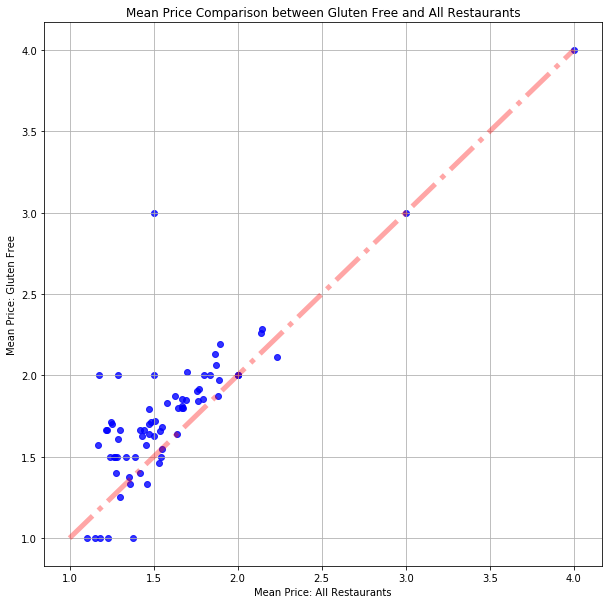

In [89]:
##- Plot Mean Price

#- Set Size
plt.figure(figsize = (10, 10))


#- Add Line: No Relationship
plt.plot([1.0, 4.0], [1.0, 4.0], linewidth=5, alpha=0.35, color='red', linestyle='-.')


#- Create Scatter of Points
plt.scatter(meanChart_df[meanPriceAllColumnName], meanChart_df[meanPriceGfColumnName], alpha= 0.8,
           c='blue')


#- Set Chart Metadata
plt.title("Mean Price Comparison between Gluten Free and All Restaurants")
plt.xlabel("Mean Price: All Restaurants")
plt.ylabel("Mean Price: Gluten Free")
plt.grid()


#- Save To Disk
priceComparisonImagePath = os.path.join('.', outputDirectory, priceComparisonFileName)

plt.savefig(priceComparisonImagePath)


#- Display Chart
plt.show()

<class 'matplotlib.figure.Figure'>


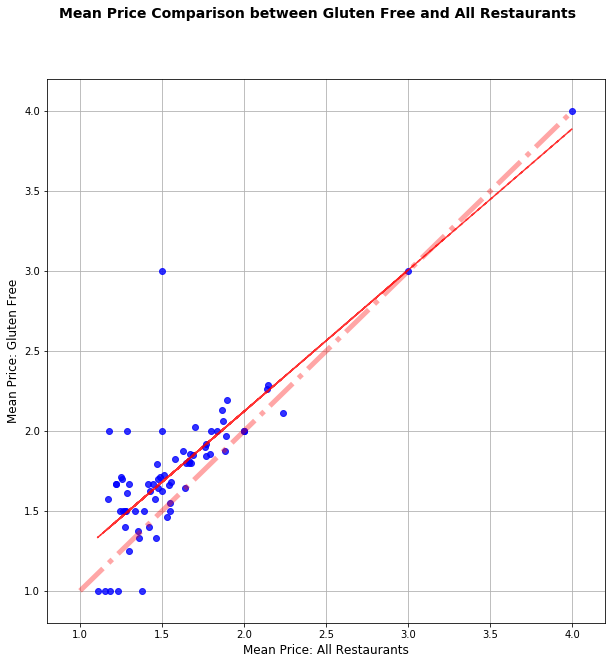

In [96]:
##- Plot Mean Price

#- Create Fit Line
(slope, intercept, _, _, _) = linregress(meanChart_df[meanPriceAllColumnName], 
                                         meanChart_df[meanPriceGfColumnName])

fit = slope * meanChart_df[meanPriceAllColumnName] + intercept


#- Create Chart
fig, ax = plt.subplots()

fig.set_size_inches(10, 10)

# Plot: Points
ax.plot(meanChart_df[meanPriceAllColumnName], meanChart_df[meanPriceGfColumnName], alpha= 0.8,
           c='blue', linewidth = 0, marker='o')

# Plot: Best Fit Line
ax.plot(meanChart_df[meanPriceAllColumnName], fit, alpha=0.8, linestyle="--", color='red')

# Plot: No Difference
ax.plot([1.0, 4.0], [1.0, 4.0], linewidth=5, alpha=0.35, color='red', linestyle='-.')


# Set XY Limites
ax.set_xlim(0.8, 4.2)
ax.set_ylim(0.8, 4.2)


#- Set Chart Metadata
fig.suptitle("Mean Price Comparison between Gluten Free and All Restaurants", fontsize=14, fontweight='bold')

ax.set_xlabel("Mean Price: All Restaurants", fontsize= 12)
ax.set_ylabel("Mean Price: Gluten Free", fontsize= 12)

plt.grid()


#- Save To Disk
# priceComparisonImagePath = os.path.join('.', outputDirectory, priceComparisonFileName)

# plt.savefig(priceComparisonImagePath)


#- Display Chart
plt.show()